In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

25000

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.0082 - acc: 0.9979 - val_loss: 0.7228 - val_acc: 0.8648
Epoch 2/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.0026 - acc: 0.9999 - val_loss: 0.7439 - val_acc: 0.8650
Epoch 3/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.0076 - acc: 0.9979 - val_loss: 0.7792 - val_acc: 0.8650
Epoch 4/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.7953 - val_acc: 0.8640
Epoch 5/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.8507 - val_acc: 0.8596
Epoch 6/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.8553 - val_acc: 0.8630
Epoch 7/20
15000/15000 [==============================] - 3s 191us/step - loss: 8.8145e-04 - acc: 0.9999 - val_loss: 0.950

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

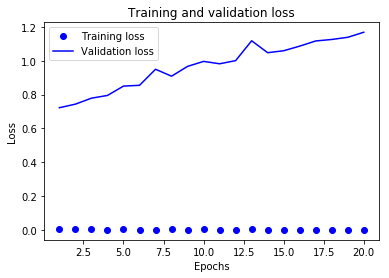

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

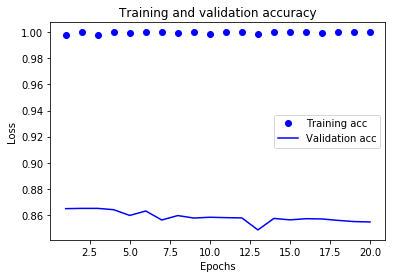

In [28]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
#model.fit(x_train, y_train, epochs=4, batch_size=512)
#results = model.evaluate(x_test, y_test)
#print(results)

Epoch 1/4
25000/25000 [==============================] - 6s 250us/step - loss: 0.3480 - acc: 0.9429
Epoch 2/4
25000/25000 [==============================] - 4s 143us/step - loss: 0.1681 - acc: 0.9558
Epoch 3/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.1343 - acc: 0.9636 0s - loss: 0.1363 -
Epoch 4/4
25000/25000 [==============================] - 4s 143us/step
[0.52685761343956, 0.84896]


In [37]:
#model.predict(x_test)

array([[0.01024641],
       [0.99999976],
       [0.21982509],
       ...,
       [0.07951983],
       [0.07571418],
       [0.34950233]], dtype=float32)